## ADHS DATENSATZ

Adhs Datensatz laden, Dimensionen und Auflösung vergleichen. 

(91, 109, 91, 1200)
(160, 240, 256)
(64, 64, 36, 78)


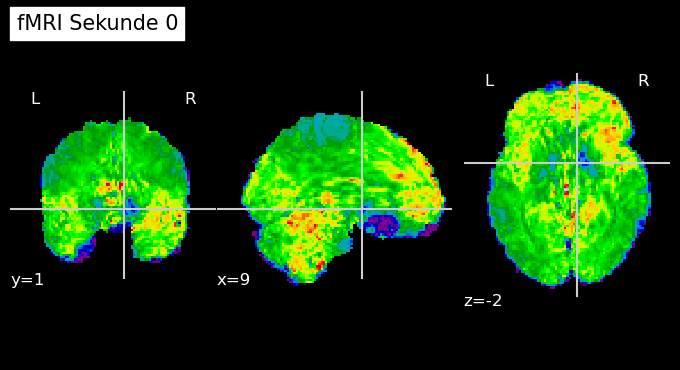

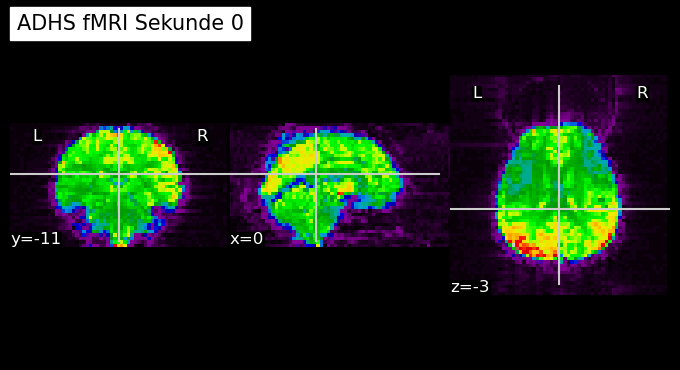

In [2]:
# Bibliotheken importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib  # Für das Lesen von fMRI-Daten
from nilearn import datasets, image, plotting  # Für die Visualisierung der Gehirnaktivität
from nilearn.connectome import ConnectivityMeasure  # Für die Berechnung der Functional Connectomes
import nibabel as nib


# Lade der fMRI-Daten von den normalen erwachsenen Personen
file_path = "/Users/thomaspfaffinger/Coding/BrainActivity/Datensatz/Vorb_Datensatz/F/100307/rfMRI_REST1_LR_hp2000_clean.nii"  # "Pfad_zur_Datei/fMRI_Daten.nii.gz"
fmri_img = nib.load(file_path)

# Laden der fMRI-ADHS-Daten, 
file_path_adhs_T1w = "/Users/thomaspfaffinger/Coding/BrainActivity/Datensatz_ADHS/Vorbereitet/sub-1084283_ses-1_run-1_T1w.nii"
file_path_adhs_bold = "/Users/thomaspfaffinger/Coding/BrainActivity/Datensatz_ADHS/Vorbereitet/sub-1084283_ses-1_task-rest_run-1_bold.nii"
fmri_img_adhs_t1w = nib.load(file_path_adhs_T1w)
fmri_img_adhs2_bold = nib.load(file_path_adhs_bold)

# Auflösung vergleichen
print(fmri_img.shape)
print(fmri_img_adhs_t1w.shape)
print(fmri_img_adhs2_bold.shape)

# Plotten der ursprünglichen fMRI-Daten zum Zeitpunkt 0
plotting.plot_epi(fmri_img.slicer[:, :, :, 0], title='fMRI Sekunde 0')

# Plotten der ADHS-fMRI-Daten zum Zeitpunkt 0
plotting.plot_epi(fmri_img_adhs2_bold.slicer[:, :, :, 0], title='ADHS fMRI Sekunde 0')

Aus dem Auflösungsvergleich lässt sich schließen, das wir die "fmri_img_adhs2_bold" Daten verwenden müssen, da diese 4D-fMRI Bilder beinhaltet. 

Im folgenden Codeblock wird der "atlas_harvard_oxford" untersucht, welchen wir in unserer neurotypische Pipeline verwendet haben. Es soll geprüft werden welche Dimension dieser hat.  

In [3]:
# Verweis auf die neurotypische Pipeline. 
dataset_o = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
print(len(dataset_o))

atlas_filename = dataset_o.maps
print(atlas_filename.shape)

labels = dataset_o.labels
print(len(labels)) #49 labels -> aber erster Label ist Hintergrund -> nicht relevant => 48 Labels

4
(91, 109, 91)
49


Der Atlas besitz die gleiche Auflösung wie unser Ursprungsdatensatz (91, 109, 91) damit scheint es zu funktionieren.
Wir laden auch dne msdl Atlas und wenden ihn an den rohen Kinderdaten (fmri_img_adhs2_bold) an. 

5
71


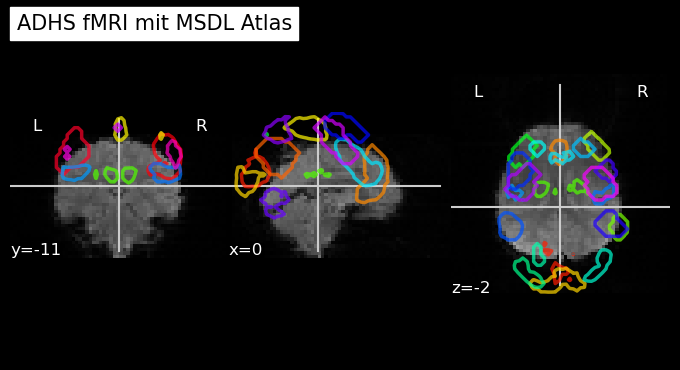

In [4]:
#Laden des msdl Atlas

msdl_atlas = datasets.fetch_atlas_msdl(data_dir= None)
msdl_coords = msdl_atlas.region_coords
anzahl_regions = len(msdl_coords)
print(len(msdl_atlas))
print(len(msdl_atlas.maps))

plotting.plot_prob_atlas(msdl_atlas.maps, bg_img=fmri_img_adhs2_bold.slicer[:, :, :, 40], title='ADHS fMRI mit MSDL Atlas')

Der Overlay des Atlas passt nicht. Somit transformieren wir nun die Daten auf die Auflösung des Atlases von (91, 109, 91)

(91, 109, 91, 1200)
(91, 109, 91)


/Applications/anaconda3/envs/BrainActivity/lib/python3.11/site-packages/nilearn/image/resampling.py:756: UserWarning: Casting data from int16 to float32
  return resample_img(


(91, 109, 91, 78)


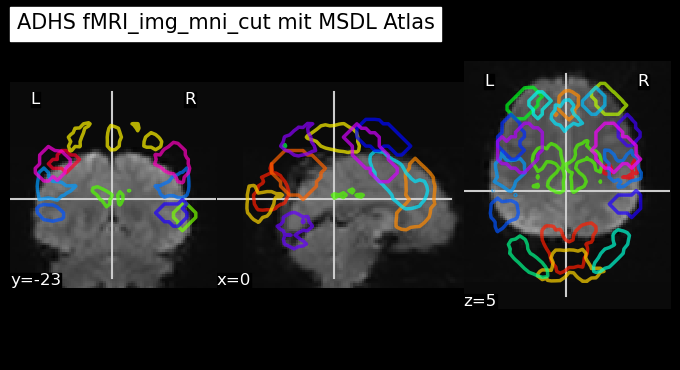

In [5]:
# Gewünschte Auflösung generieren
print(fmri_img.shape)
fmri_img_cut = fmri_img.slicer[:,:,:,0]
print(fmri_img_cut.shape)

# Resamplen der fMRI-Daten in den MNI-Raum
fmri_img_mni_cut = image.resample_to_img(fmri_img_adhs2_bold, fmri_img_cut)
print(fmri_img_mni_cut.shape)

plotting.plot_prob_atlas(msdl_atlas.maps, bg_img=fmri_img_mni_cut.slicer[:, :, :, 40], title='ADHS fMRI_img_mni_cut mit MSDL Atlas')

Es scheint nicht zu funktionieren. 
Wir probieren es mit dem "Havard-Oxford-Atlas"

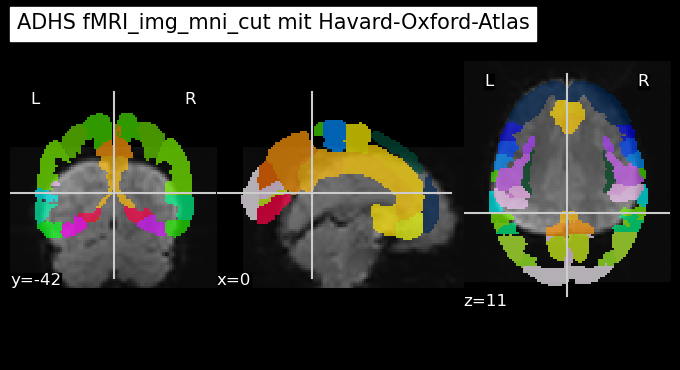

In [6]:
plotting.plot_roi(atlas_filename, bg_img=fmri_img_mni_cut.slicer[:, :, :, 40], title='ADHS fMRI_img_mni_cut mit Havard-Oxford-Atlas')

Auch hier funktioniert die Überlagerung nicht. 

Recherchen aus dem Internet haben folgendes ergeben.

Das Atlas-Mapping von fMRI-Daten bei Kindern erfordert spezielle Atlanten, da sich das Gehirn von Kindern in Struktur und Größe von dem eines Erwachsenen unterscheidet. Ein direktes Anwenden eines Erwachsenenatlas auf Kinder fMRI-Daten kann zu ungenauen Ergebnissen führen, da die Atlas-Regionen möglicherweise nicht korrekt auf das kindliche Gehirn abgebildet werden. 
Es muss also ein kinder-spezifischen Atlas verwendet werden, wie der "Haskins pediatric atlas" welcher für Kinder in dem Alter von 7 bis 14 Jahre entwickelt wurde. In dieser Altersspanne bewegt sich auch unser Datensatz. 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7981247/